# IRIS FLOWER CLASSIFIER

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import kaggle
import zipfile36 as zipfile
import warnings
warnings.filterwarnings('ignore')

In [2]:
!kaggle datasets download -d saurabh00007/iriscsv

iriscsv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
zipfile_name = 'iriscsv.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [4]:
df = pd.read_csv('Iris.csv')

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.drop(columns = ['Id'], inplace=True)

In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Exploratory Data Analysis:

<Axes: >

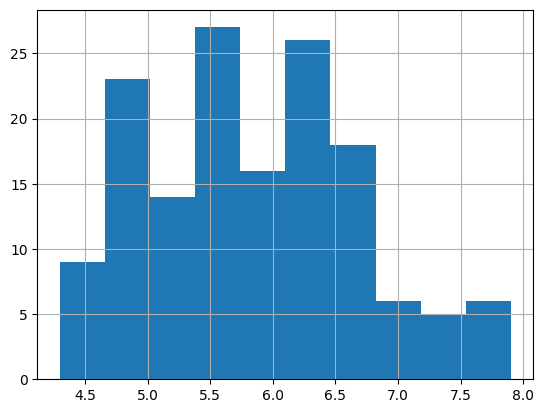

In [12]:
df['SepalLengthCm'].hist()

<Axes: >

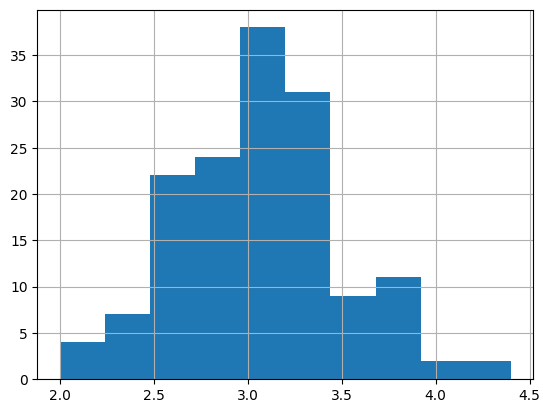

In [13]:
df['SepalWidthCm'].hist()

__The above histogram shows that it is a NORMAL DISTRIBUTION.__

<Axes: >

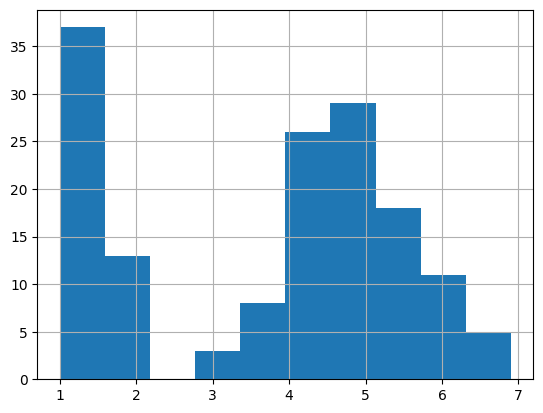

In [14]:
df['PetalLengthCm'].hist()

<Axes: >

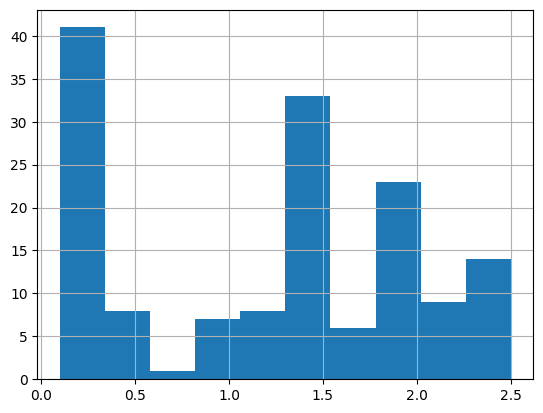

In [15]:
df['PetalWidthCm'].hist()

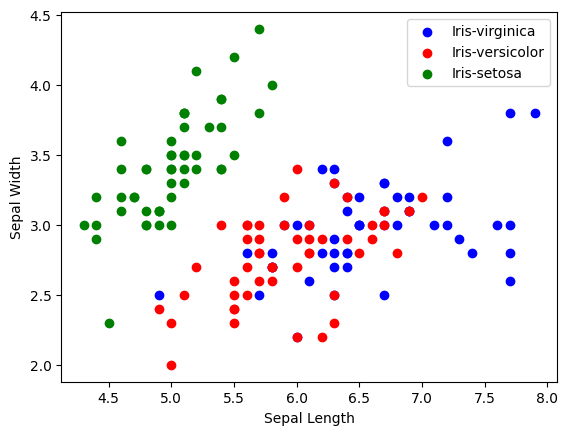

In [16]:
colors = ['blue', 'red', 'green']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

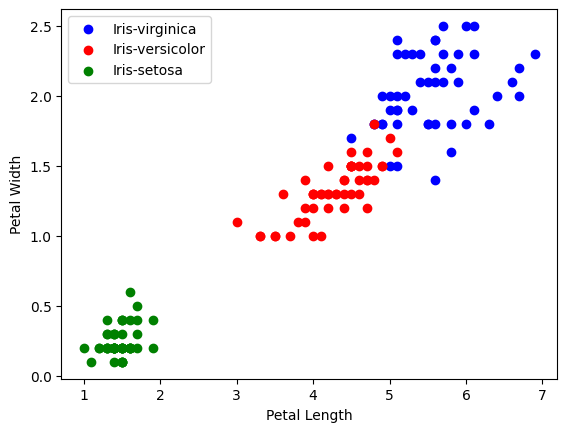

In [17]:
colors = ['blue', 'red', 'green']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

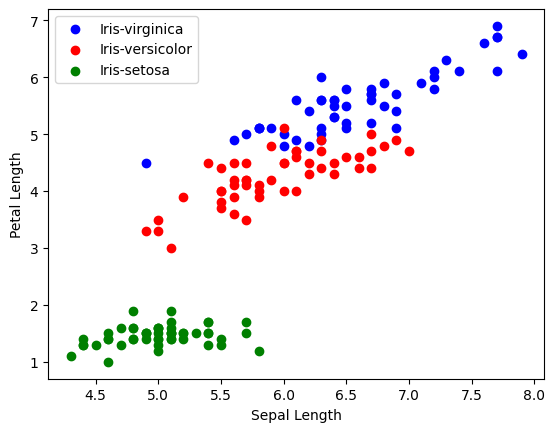

In [18]:
colors = ['blue', 'red', 'green']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

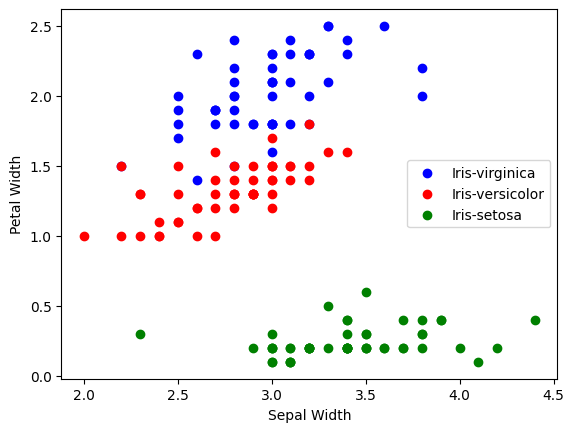

In [19]:
colors = ['blue', 'red', 'green']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

# Correlation Matrix:

In [20]:
df1 = df.copy()

In [21]:
df1.drop(columns = ['Species'], inplace=True)

In [22]:
df1.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

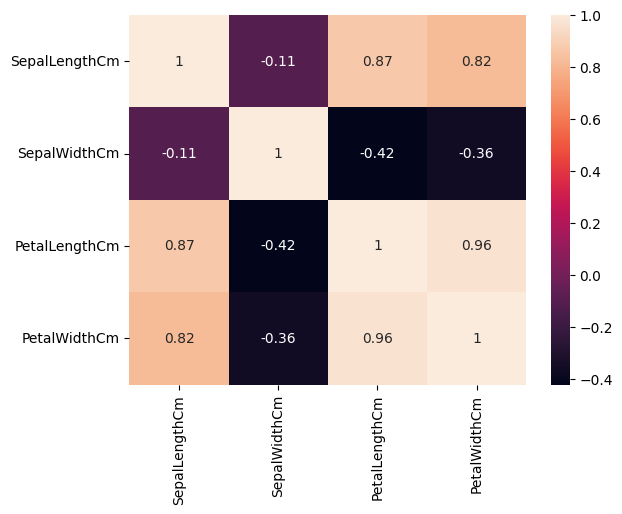

In [23]:
sns.heatmap(df1.corr(), annot=True)

# Label Encoder:

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()

In [26]:
df['Species'] = le.fit_transform(df['Species'])

In [27]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
df.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
112,6.8,3.0,5.5,2.1,2
69,5.6,2.5,3.9,1.1,1
29,4.7,3.2,1.6,0.2,0
54,6.5,2.8,4.6,1.5,1
19,5.1,3.8,1.5,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
76,6.8,2.8,4.8,1.4,1
27,5.2,3.5,1.5,0.2,0
119,6.0,2.2,5.0,1.5,2


# Model Training:

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = df.drop(columns=['Species'])
y = df['Species']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Logistic Regression:

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
model = LogisticRegression()

In [54]:
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
print("Accuracy: ", model.score(X_test, y_test) * 100)

Accuracy:  93.33333333333333


# KNN:

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
m = KNeighborsClassifier()

In [38]:
m.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
print("Accuracy: ", model.score(X_test, y_test) * 100)

Accuracy:  97.77777777777777


# Decision Tree Classifier:

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
m = DecisionTreeClassifier()

In [42]:
m.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
print("Accuracy: ", model.score(X_test, y_test) * 100)

Accuracy:  97.77777777777777


In [55]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))

In [56]:
load_model = pickle.load(open('model.pkl', 'rb'))

# Model Prediction:

__0 --> Iris-setosa__

__1 --> Iris-versicolor__

__2 --> Iris-virginica__

In [57]:
load_model.predict([[6.0, 2.2, 4.0, 1.0]])

array([1])

In [58]:
load_model.predict([[6.2, 3.4, 5.4, 2.3]])

array([2])

In [59]:
load_model.predict([[5.1, 3.8, 1.6, 0.2]])

array([0])